<a href="https://colab.research.google.com/github/victorbertoldo/mba-data-analytics/blob/main/Estatistica_MBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

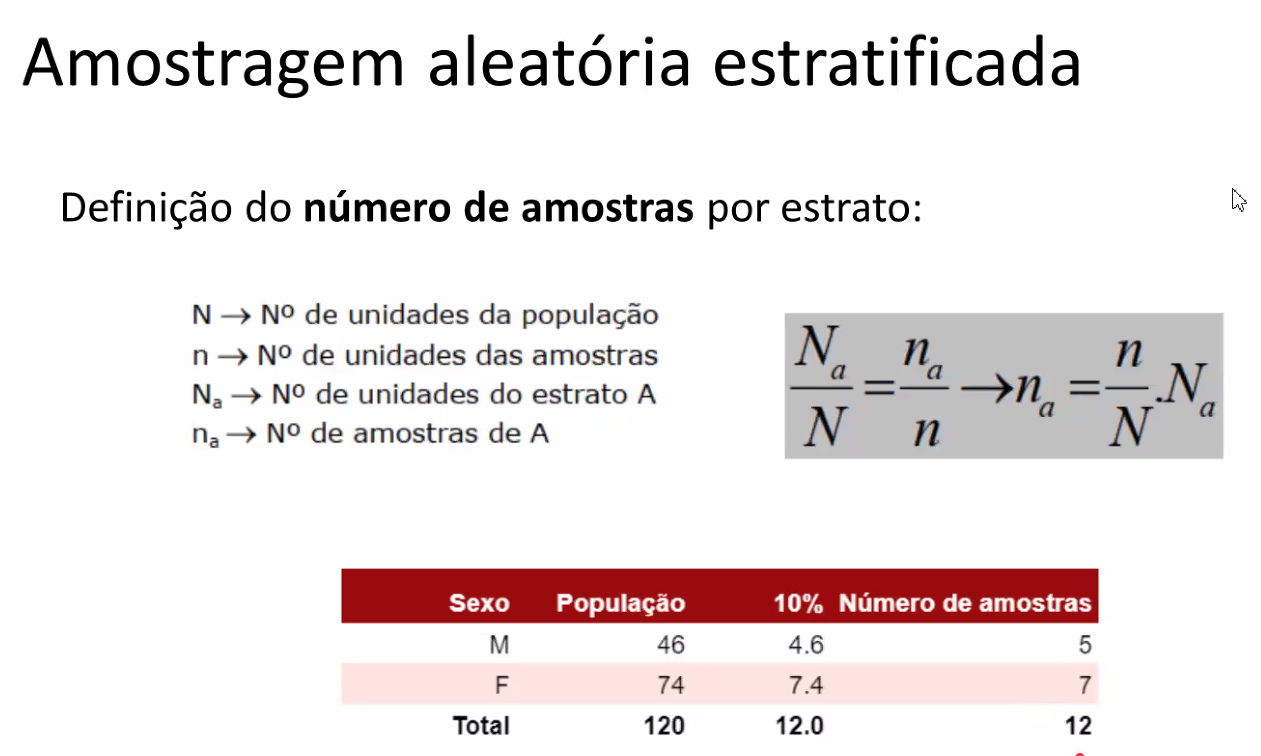

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/pos_data_analytics/dados-delivery.csv')
df.head()

,Produto,dia-da-semana,hora-do-pedido,tempo-entrega,tempo-entrega-real,data-pedido,valor,atraso,avaliacao
0,A,4.0,14.0,15.0,15.0,12/24/2020,39.0,0.0,10.0
1,A,7.0,13.0,15.0,60.0,12/16/2020,10.0,1.0,0.0
2,B,7.0,14.0,30.0,30.0,12/27/2020,30.0,0.0,9.0
3,A,3.0,13.0,45.0,15.0,12/17/2020,44.0,0.0,8.0
4,B,6.0,13.0,60.0,75.0,12/18/2020,23.0,1.0,1.0


In [4]:
df.columns

Index(['Produto', 'dia-da-semana', 'hora-do-pedido', 'tempo-entrega',
       'tempo-entrega-real', 'data-pedido', 'valor', 'atraso', 'avaliacao'],
      dtype='object')

In [5]:
df.dtypes

Produto                object
dia-da-semana         float64
hora-do-pedido        float64
tempo-entrega         float64
tempo-entrega-real    float64
data-pedido            object
valor                 float64
atraso                float64
avaliacao             float64
dtype: object

In [58]:
df.shape

(532, 9)

In [7]:
df_select = df[['Produto','tempo-entrega','tempo-entrega-real','valor']]
df_select.head()

,Produto,tempo-entrega,tempo-entrega-real,valor
0,A,15.0,15.0,39.0
1,A,15.0,60.0,10.0
2,B,30.0,30.0,30.0
3,A,45.0,15.0,44.0
4,B,60.0,75.0,23.0


In [49]:
cont_produto = df_select.groupby(['Produto'])['Produto'].count().sort_values(ascending=False)
cont_produto

Produto
D     80
B     73
A     65
G     59
C     57
F     57
H     52
I     45
E     40
65     1
V      1
X      1
Name: Produto, dtype: int64

In [15]:
populacao = df.shape[0]
populacao

532

In [19]:
und_extrato = cont_produto.count()
und_extrato

12

In [50]:
cont_produto = cont_produto.to_frame()

cont_produto['%'] = cont_produto.Produto * 0.20
cont_produto

,Produto,%
Produto,,
D,80,16.0
B,73,14.6
A,65,13.0
G,59,11.8
C,57,11.4
F,57,11.4
H,52,10.4
I,45,9.0
E,40,8.0


In [53]:
cont_produto['n_amostras'] = cont_produto['%'].round().astype(int)

In [59]:
cont_produto

,Produto,%,n_amostras
Produto,,,
D,80,16.0,16
B,73,14.6,15
A,65,13.0,13
G,59,11.8,12
C,57,11.4,11
F,57,11.4,11
H,52,10.4,10
I,45,9.0,9
E,40,8.0,8


In [56]:
numero_und_amostras = cont_produto.n_amostras.sum()
numero_und_amostras

105

In [57]:
(numero_und_amostras / populacao) * und_extrato

2.3684210526315788

In [61]:
produto_a = df[df['Produto']=='A']
produto_a.sample(13)

,Produto,dia-da-semana,hora-do-pedido,tempo-entrega,tempo-entrega-real,data-pedido,valor,atraso,avaliacao
355,A,4.0,21.0,80.0,165.0,12/14/2020,8.0,1.0,1.0
407,A,7.0,6.0,70.0,125.0,12/29/2020,7.0,1.0,2.0
447,A,5.0,8.0,105.0,50.0,12/3/2020,3.0,0.0,8.0
55,A,6.0,13.0,110.0,105.0,12/7/2020,7.0,0.0,8.0
465,A,5.0,20.0,60.0,105.0,12/14/2020,31.0,1.0,0.0
29,A,7.0,12.0,15.0,30.0,12/26/2020,34.0,1.0,3.0
398,A,1.0,21.0,65.0,150.0,12/21/2020,15.0,1.0,3.0
167,A,1.0,11.0,105.0,75.0,12/26/2020,47.0,0.0,8.0
261,A,5.0,18.0,10.0,120.0,12/30/2020,19.0,1.0,1.0
425,A,1.0,2.0,80.0,170.0,12/27/2020,12.0,1.0,3.0


In [62]:
from sklearn.model_selection import train_test_split

In [66]:
# pra pegar a amostra usando sklearn o df não pode ter dados nulos
df.dropna(inplace=True)
df.drop([9,13], inplace=True)

In [67]:
# separando os dados de forma estratificada pela coluna "Produto" proporcional a 20%
X_train, X_test, y_train, y_test = train_test_split(df.drop('Produto', axis=1), df['Produto'], test_size=0.2, random_state=42, stratify=df['Produto'])

# os dados de interesse estão em X_test e y_test

In [68]:
estratificado = X_test
estratificado['Produto'] = y_test
estratificado

,dia-da-semana,hora-do-pedido,tempo-entrega,tempo-entrega-real,data-pedido,valor,atraso,avaliacao,Produto
360,4.0,22.0,20.0,60.0,12/1/2020,5.0,1.0,3.0,B
42,7.0,12.0,35.0,150.0,12/3/2020,26.0,1.0,2.0,D
319,2.0,22.0,125.0,120.0,12/23/2020,13.0,0.0,10.0,A
314,7.0,19.0,95.0,85.0,12/22/2020,13.0,0.0,10.0,C
270,2.0,18.0,30.0,15.0,12/30/2020,13.0,0.0,8.0,B
...,...,...,...,...,...,...,...,...,...
80,3.0,12.0,125.0,60.0,12/9/2020,16.0,0.0,8.0,E
225,6.0,18.0,150.0,165.0,12/12/2020,7.0,1.0,5.0,F
318,7.0,20.0,15.0,160.0,12/17/2020,5.0,1.0,0.0,H
221,6.0,22.0,15.0,155.0,12/27/2020,8.0,1.0,3.0,A
